In [1]:
# Install Essential Libraries
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving car.zip to car.zip


In [5]:
!unzip car.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/car/train/labels/00000_00004_00001_png.rf.557d3494b3e633e29069a6f42918334e.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00002_png.rf.3e3e95e1ba16cac885d3de7864a40fb4.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00003_png.rf.9c6ba4d0186eec82a26bddc9a1204efb.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00003_png.rf.a8220aafd1a7f7bba4391bd0a10cdd2f.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00004_png.rf.d4f5ee50324659a47ec7ae664f8ce3a6.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00005_png.rf.55e0ec09c7c892e631d9197011a8ad27.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00006_png.rf.da366faadf7731d50e66efd84b21603d.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00007_png.rf.f744cfc8a356e487f01a3bb8a4811faf.txt  
  inflating: /content/dataset/car/train/labels/00000_00004_00

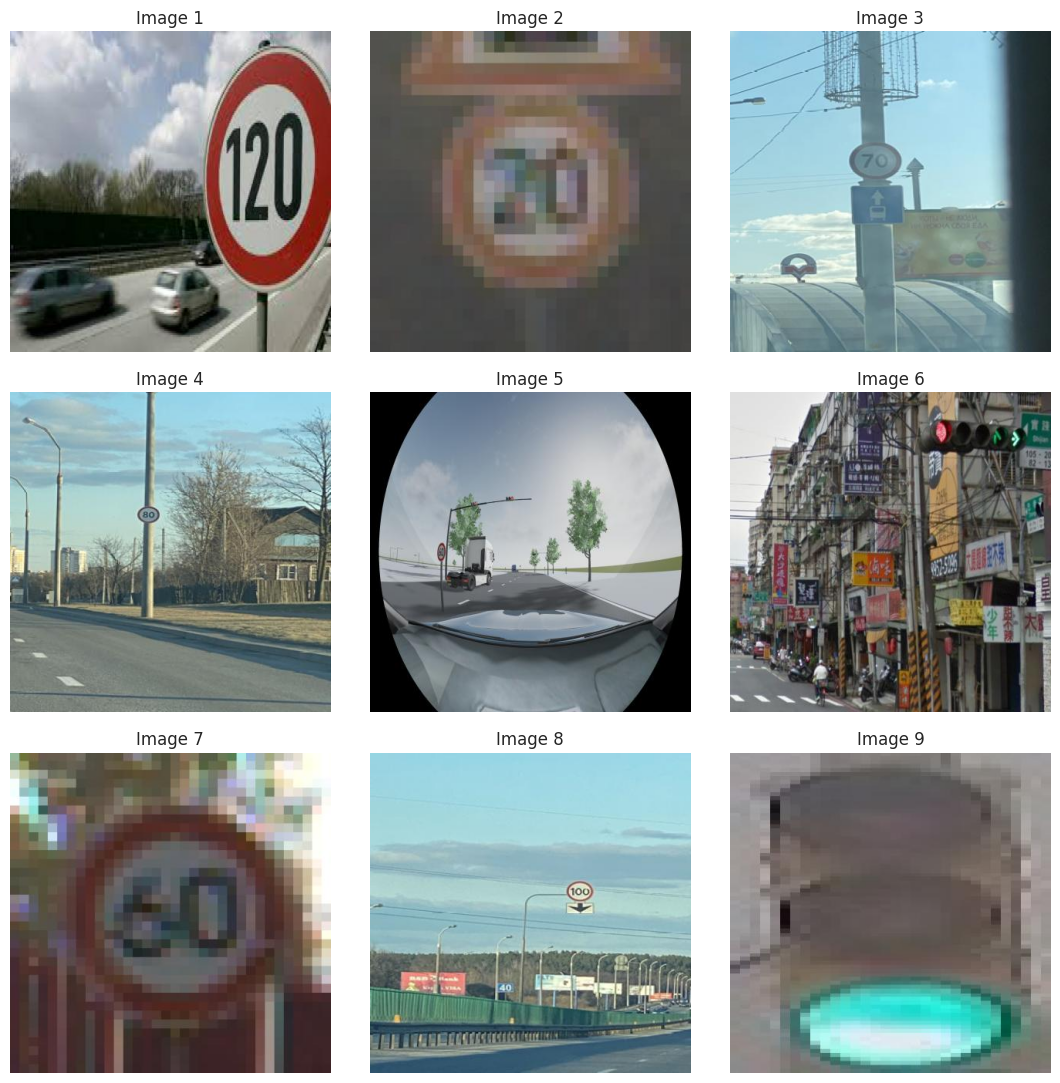

In [6]:
Image_dir = '/content/dataset/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Get the size of the image
image = cv2.imread("/content/dataset/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 378MB/s]



image 1/1 /content/dataset/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 8.5ms
Speed: 11.8ms preprocess, 8.5ms inference, 79.6ms postprocess per image at shape (1, 3, 640, 640)


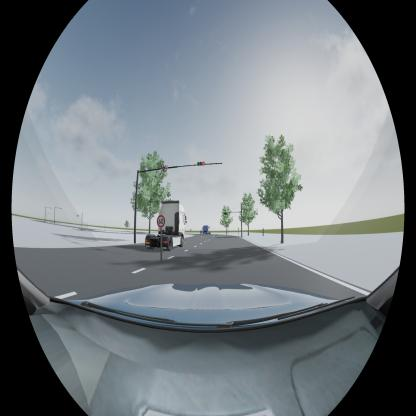

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/dataset/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
!pip install --upgrade ultralytics ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 10.9 MB/s eta 0:00:00


In [11]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/dataset/car/data.yaml",epochs = 50, batch = -1, optimizer = 'auto')


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning /content/dataset/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 7.56G reserved, 0.39G allocated, 6.79G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3013773       8.209         1.114         27.81         21.09        (1, 3, 640, 640)                    list
     3013773       16.42         1.256         24.55          24.1        (2, 3, 640, 640)                    list
     3013773       32.84         1.569         25.68         24.47        (4, 3, 640, 640)                    list
     3013773       65.67         2.137         27.36         36.14        (8, 3, 640, 640)                    list
     3013773       131.3         3.217          40.1          69.9       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 21 for CUDA:0 11.89G/14.74G (81%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 984.0±425.3 MB/s, size: 26.0 KB)


train: Scanning /content/dataset/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 394.1±417.4 MB/s, size: 19.9 KB)


val: Scanning /content/dataset/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004921875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.01G     0.8449      3.465      1.192          3        640: 100%|██████████| 169/169 [01:24<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


                   all        801        944      0.277      0.506      0.292      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.64G      0.762      2.536      1.106          7        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.20it/s]

                   all        801        944      0.315      0.481      0.366      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.66G     0.7457      2.131      1.079          3        640: 100%|██████████| 169/169 [01:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        801        944      0.407      0.524      0.471      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.66G     0.7155      1.809      1.055          9        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]

                   all        801        944      0.605      0.668      0.681      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.66G     0.7107      1.572      1.056          3        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


                   all        801        944      0.705       0.69       0.75      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.66G     0.6962      1.367      1.042          6        640: 100%|██████████| 169/169 [01:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]

                   all        801        944       0.73      0.725      0.787      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.66G     0.6702      1.259      1.027          5        640: 100%|██████████| 169/169 [01:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]

                   all        801        944      0.812      0.714      0.801      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.66G     0.6708      1.173      1.028          2        640: 100%|██████████| 169/169 [01:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


                   all        801        944      0.826      0.743      0.826      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.66G      0.653      1.084      1.026          4        640: 100%|██████████| 169/169 [01:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        801        944      0.852      0.787      0.861       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.67G     0.6461      1.042      1.014          6        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]

                   all        801        944      0.909      0.751      0.863      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.68G     0.6386     0.9883      1.005          5        640: 100%|██████████| 169/169 [01:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]

                   all        801        944      0.892      0.814      0.889      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.7G     0.6299     0.9649      1.015          2        640: 100%|██████████| 169/169 [01:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        801        944      0.895      0.809      0.904      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.7G     0.6172     0.8957      1.002          8        640: 100%|██████████| 169/169 [01:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]

                   all        801        944      0.915      0.821      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.7G     0.6126     0.8809          1          5        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]

                   all        801        944       0.93      0.828      0.917      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.71G     0.6014     0.8439     0.9929          5        640: 100%|██████████| 169/169 [01:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


                   all        801        944      0.917      0.813       0.91      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.71G     0.5967      0.828     0.9949          2        640: 100%|██████████| 169/169 [01:01<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        801        944      0.904      0.866      0.928      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.71G     0.6068     0.8248     0.9961          4        640: 100%|██████████| 169/169 [01:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]

                   all        801        944      0.912      0.846      0.923      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.71G     0.5886     0.7882     0.9852          5        640: 100%|██████████| 169/169 [01:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]

                   all        801        944      0.943      0.833      0.927      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.71G     0.5974     0.7843     0.9876          1        640: 100%|██████████| 169/169 [01:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]

                   all        801        944      0.937      0.852      0.936      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.71G     0.5871      0.754     0.9827          6        640: 100%|██████████| 169/169 [01:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]

                   all        801        944      0.932      0.826      0.927      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.71G     0.5849     0.7296     0.9841          1        640: 100%|██████████| 169/169 [01:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]

                   all        801        944      0.928      0.875      0.938      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.71G     0.5859     0.7391      0.979          4        640: 100%|██████████| 169/169 [01:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        801        944      0.947      0.861      0.943      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.71G     0.5814     0.7151     0.9771          6        640: 100%|██████████| 169/169 [01:04<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]


                   all        801        944      0.907      0.873      0.934      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.71G     0.5801     0.7066     0.9777          3        640: 100%|██████████| 169/169 [01:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]

                   all        801        944      0.951      0.887      0.945      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.71G     0.5656     0.6844      0.976          8        640: 100%|██████████| 169/169 [01:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]


                   all        801        944       0.94      0.851      0.939        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.71G     0.5605      0.689     0.9754          7        640: 100%|██████████| 169/169 [01:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]


                   all        801        944      0.924      0.875      0.948       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.71G     0.5531     0.6709     0.9685          4        640: 100%|██████████| 169/169 [01:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        801        944      0.948      0.853      0.942      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.71G      0.562     0.6792     0.9732          5        640: 100%|██████████| 169/169 [01:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.12it/s]

                   all        801        944      0.925      0.867      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.71G      0.555      0.638      0.968          5        640: 100%|██████████| 169/169 [01:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]

                   all        801        944      0.933       0.86      0.942      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.71G     0.5559     0.6454     0.9604          8        640: 100%|██████████| 169/169 [01:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]

                   all        801        944      0.941      0.871      0.951      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.71G     0.5442     0.6199     0.9609          3        640: 100%|██████████| 169/169 [01:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]

                   all        801        944      0.952      0.883       0.95      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.71G     0.5501     0.6201     0.9649          3        640: 100%|██████████| 169/169 [01:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]

                   all        801        944      0.934      0.878      0.947      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.71G      0.544     0.6076     0.9641          4        640: 100%|██████████| 169/169 [01:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.88it/s]

                   all        801        944      0.962      0.885      0.954      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.71G     0.5378     0.5957     0.9581          4        640: 100%|██████████| 169/169 [01:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.20it/s]

                   all        801        944      0.957      0.889      0.951      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.71G     0.5279     0.5891       0.96          1        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]

                   all        801        944      0.937      0.884      0.951       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.71G     0.5252      0.582      0.955          2        640: 100%|██████████| 169/169 [01:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]

                   all        801        944      0.962       0.88      0.951      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.71G     0.5254     0.5787     0.9563          4        640: 100%|██████████| 169/169 [01:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.07it/s]

                   all        801        944      0.924       0.91      0.952      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.71G     0.5193     0.5684     0.9518          7        640: 100%|██████████| 169/169 [01:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]

                   all        801        944      0.954      0.905      0.963      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.71G     0.5161     0.5672     0.9538          4        640: 100%|██████████| 169/169 [01:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]

                   all        801        944      0.973      0.882       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.71G     0.5106     0.5603     0.9501          1        640: 100%|██████████| 169/169 [01:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.10it/s]

                   all        801        944      0.945      0.884      0.955      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.71G     0.5193     0.3813      0.922          3        640: 100%|██████████| 169/169 [01:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]


                   all        801        944      0.974      0.879      0.961      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.73G     0.5128     0.3641     0.9202          2        640: 100%|██████████| 169/169 [01:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]

                   all        801        944      0.967      0.887      0.959      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.73G     0.5119     0.3593     0.9187          2        640: 100%|██████████| 169/169 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]

                   all        801        944      0.958      0.895       0.96      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.73G     0.5055     0.3523     0.9108          2        640: 100%|██████████| 169/169 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]

                   all        801        944      0.956      0.897      0.961      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.73G     0.5036     0.3463     0.9103          3        640: 100%|██████████| 169/169 [01:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]

                   all        801        944      0.956       0.91      0.965      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.73G     0.4972      0.338      0.907          2        640: 100%|██████████| 169/169 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]

                   all        801        944      0.957      0.913      0.965       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.73G     0.4914     0.3308     0.8985          3        640: 100%|██████████| 169/169 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]

                   all        801        944      0.952      0.912      0.963      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.73G     0.4809     0.3226     0.8981          2        640: 100%|██████████| 169/169 [01:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]

                   all        801        944      0.938      0.922      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.73G     0.4855      0.325     0.9035          2        640: 100%|██████████| 169/169 [00:59<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.14it/s]

                   all        801        944      0.955      0.914      0.965      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.73G     0.4813     0.3113      0.903          4        640: 100%|██████████| 169/169 [01:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.10it/s]

                   all        801        944      0.946       0.92      0.965      0.841



50 epochs completed in 0.985 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


                   all        801        944      0.946       0.92      0.965      0.841
           Green Light         87        122      0.856      0.754      0.857      0.531
             Red Light         74        108      0.816      0.759      0.828      0.516
       Speed Limit 100         52         52       0.98      0.956      0.994      0.902
       Speed Limit 110         17         17      0.829      0.941      0.978      0.917
       Speed Limit 120         60         60          1      0.999      0.995      0.921
        Speed Limit 20         56         56      0.978      0.982      0.986      0.887
        Speed Limit 30         71         74       0.95      0.959      0.988      0.927
        Speed Limit 40         53         55      0.964      0.967      0.992      0.893
        Speed Limit 50         68         71      0.996      0.915      0.976      0.867
        Speed Limit 60         76         76      0.949      0.921      0.977      0.897
        Speed Limit 7

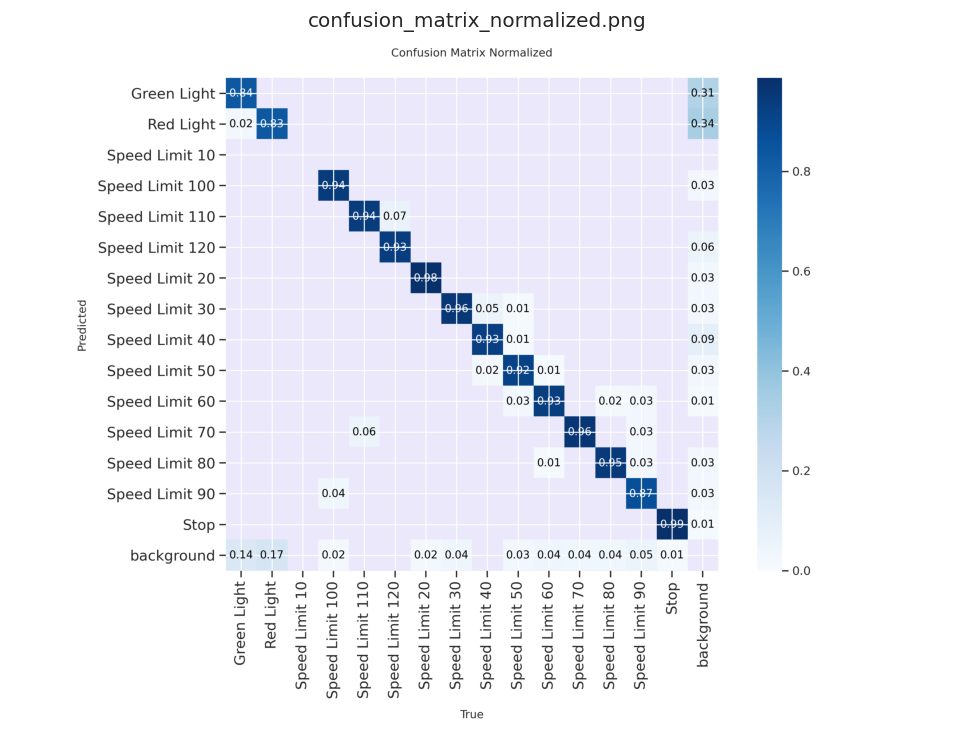

 File not found: runs/detect/train2/F1_curve.png
 File not found: runs/detect/train2/P_curve.png
 File not found: runs/detect/train2/R_curve.png
 File not found: runs/detect/train2/PR_curve.png


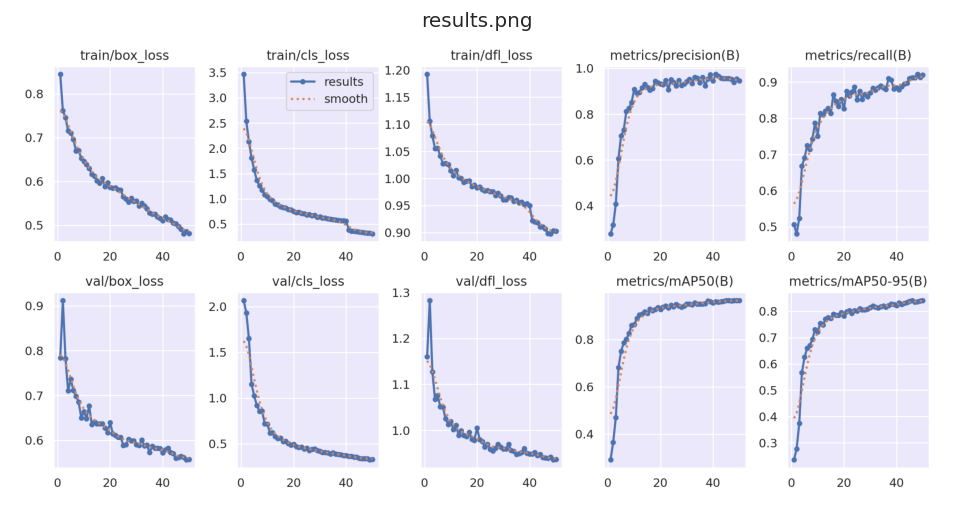

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        if not os.path.exists(image_path):
            print(f" File not found: {image_path}")
            continue

        img = cv2.imread(image_path)
        if img is None:
            print(f" Failed to load image: {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_file)
        plt.show()

#  Replace with your actual path
post_training_files_path = 'runs/detect/train2'  # Check with !ls runs/detect/

#  List of image files
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

display_images(post_training_files_path, image_files)


In [17]:
Result_Final_model = pd.read_csv('runs/detect/train2/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
40     41  2945.95         0.51928         0.38135         0.92204   
41     42  3013.28         0.51284         0.36414         0.92022   
42     43  3078.53         0.51194         0.35926         0.91869   
43     44  3145.42         0.50545         0.35232         0.91081   
44     45  3214.42         0.50356         0.34630         0.91031   
45     46  3280.78         0.49718         0.33800         0.90699   
46     47  3346.63         0.49138         0.33080         0.89854   
47     48  3413.79         0.48088         0.32260         0.89810   
48     49  3479.79         0.48548         0.32495         0.90351   
49     50  3547.24         0.48127         0.31127         0.90301   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
40               0.97411            0.87870           0.96053   
41               0.96672            0.88719           0.95914   
42               0.95754            0.89499           0.96015   
43               0.95596            0.89707           0.96143   
44               0.95558            0.90965           0.96546   
45               0.95670            0.91265           0.96486   
46               0.95202            0.91244           0.96295   
47               0.93830            0.92166           0.96510   
48               0.95462            0.91387           0.96479   
49               0.94625            0.91954           0.96512   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
40              0.83116       0.57923       0.36202       0.94866  0.000109   
41              0.82545       0.58284       0.36404       0.95233  0.000099   
42              0.83089       0.57309       0.35632       0.94548  0.000089   
43              0.83350       0.57008       0.35374       0.94777  0.000078   
44              0.83745       0.56017       0.34249       0.94079  0.000068   
45              0.84027       0.56197       0.33784       0.93992  0.000057   
46              0.83543       0.56417       0.33834       0.93947  0.000047   
47              0.83639       0.56219       0.33598       0.94193  0.000037   
48              0.83931       0.55657       0.32444       0.93588  0.000026   
49              0.84101       0.55752       0.32811       0.93717  0.000016   

      lr/pg1    lr/pg2  
40  0.000109  0.000109  
41  0.000099  0.000099  
42  0.000089  0.000089  
43  0.000078  0.000078  
44  0.000068  0.000068  
45  0.000057  0.000057  
46  0.000047  0.000047  
47  0.000037  0.000037  
48  0.000026  0.000026  
49  0.000016  0.000016

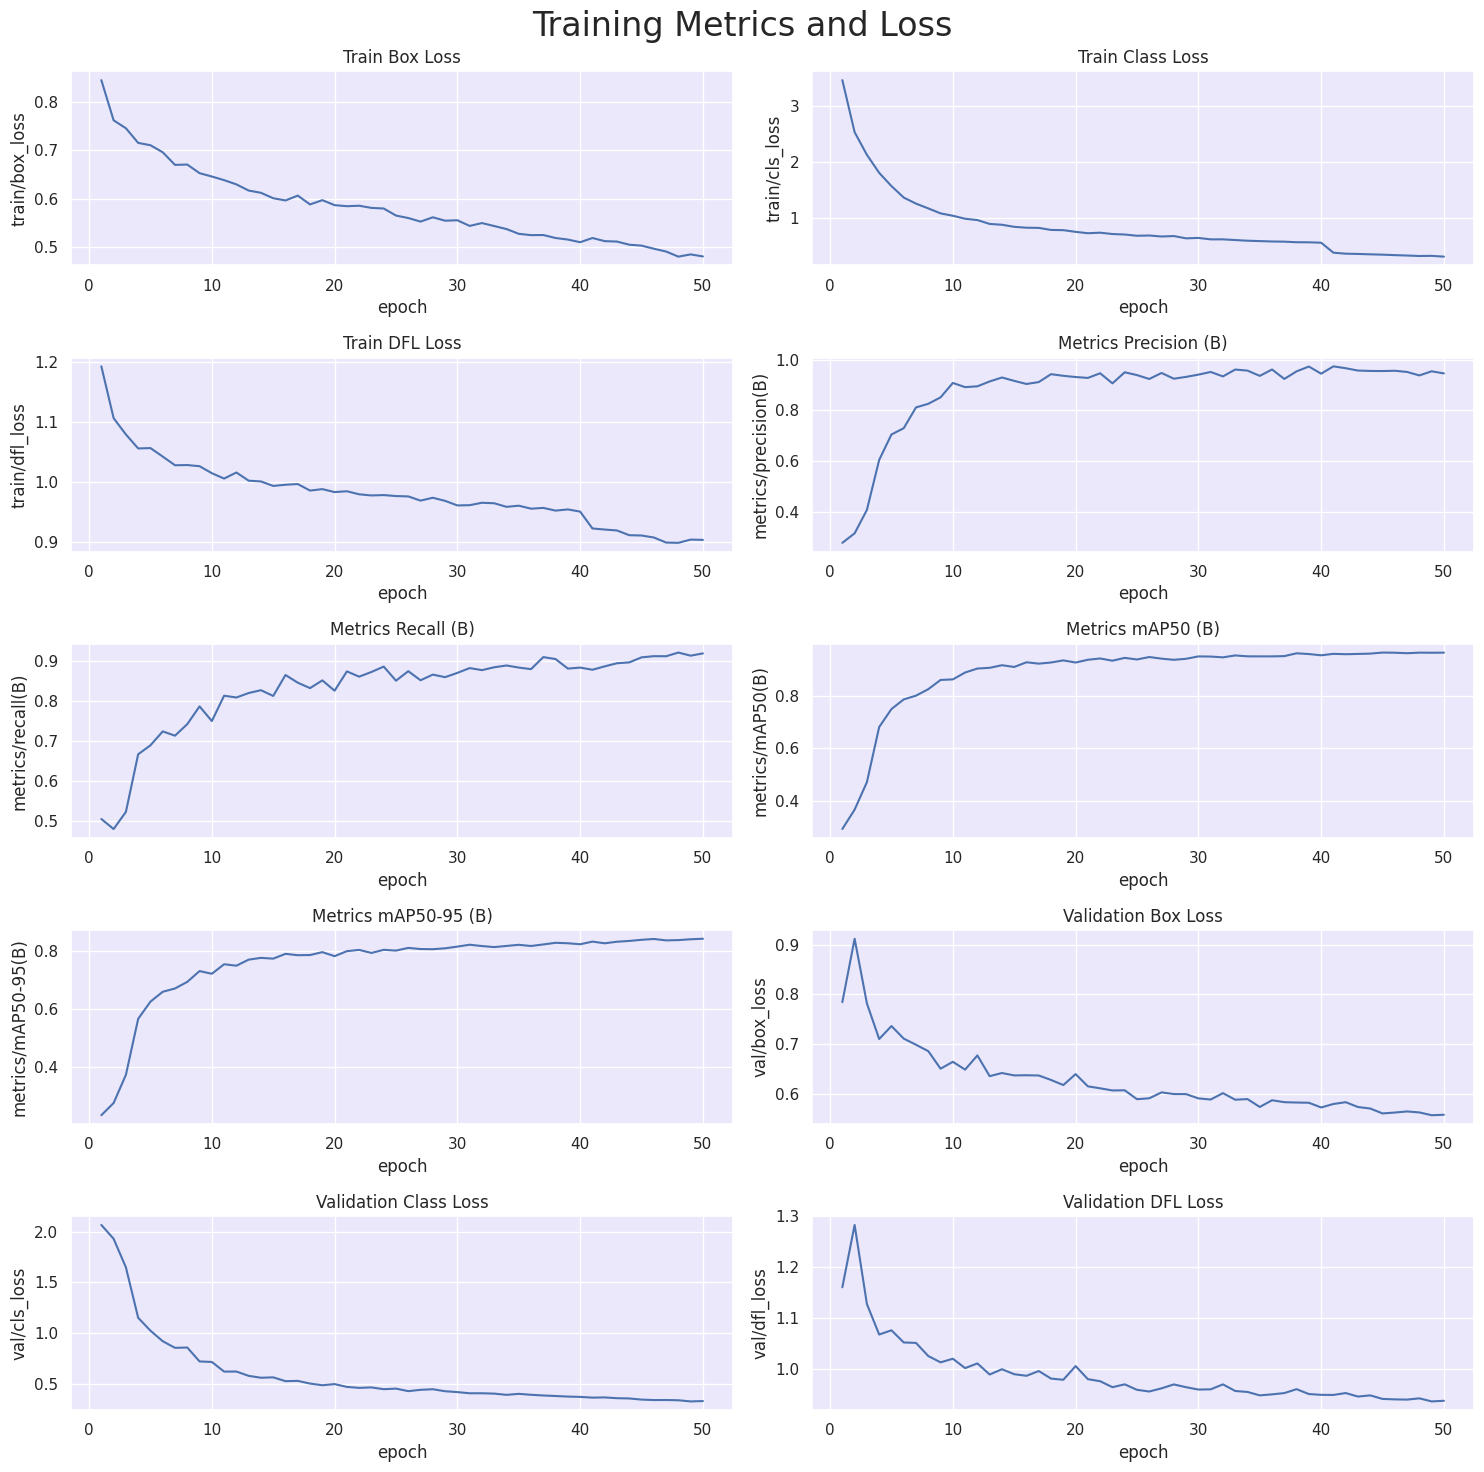

In [18]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [19]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train2/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 615.3±261.0 MB/s, size: 11.2 KB)


val: Scanning /content/dataset/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.51it/s]


                   all        801        944      0.947       0.92      0.965      0.843
           Green Light         87        122      0.865      0.754      0.858      0.529
             Red Light         74        108      0.816      0.759      0.828      0.519
       Speed Limit 100         52         52       0.98      0.955      0.994      0.904
       Speed Limit 110         17         17       0.83      0.941      0.977      0.916
       Speed Limit 120         60         60          1          1      0.995      0.926
        Speed Limit 20         56         56      0.977      0.982      0.986      0.885
        Speed Limit 30         71         74       0.95      0.959      0.988      0.928
        Speed Limit 40         53         55      0.964      0.967      0.992      0.888
        Speed Limit 50         68         71      0.996      0.915      0.976       0.87
        Speed Limit 60         76         76      0.949      0.921      0.977      0.896
        Speed Limit 7

In [22]:
from google.colab import files
uploaded = files.upload()

Saving image.zip to image.zip


In [23]:
!unzip image.zip -d /content/files

Archive:  image.zip
   creating: /content/files/image/
  inflating: /content/files/image/ladybug_panoramic_000390.jpg  
  inflating: /content/files/image/ladybug_panoramic_001697.jpg  
  inflating: /content/files/image/ladybug_panoramic_001860.jpg  
  inflating: /content/files/image/ladybug_panoramic_001861.jpg  
  inflating: /content/files/image/ladybug_panoramic_003848.jpg  
  inflating: /content/files/image/ladybug_panoramic_003907.jpg  
  inflating: /content/files/image/ladybug_panoramic_003908.jpg  
  inflating: /content/files/image/ladybug_panoramic_004334.jpg  
  inflating: /content/files/image/ladybug_panoramic_004335.jpg  



0: 640x640 (no detections), 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 20.5ms
Speed: 2.9ms preprocess, 20.5ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 0.

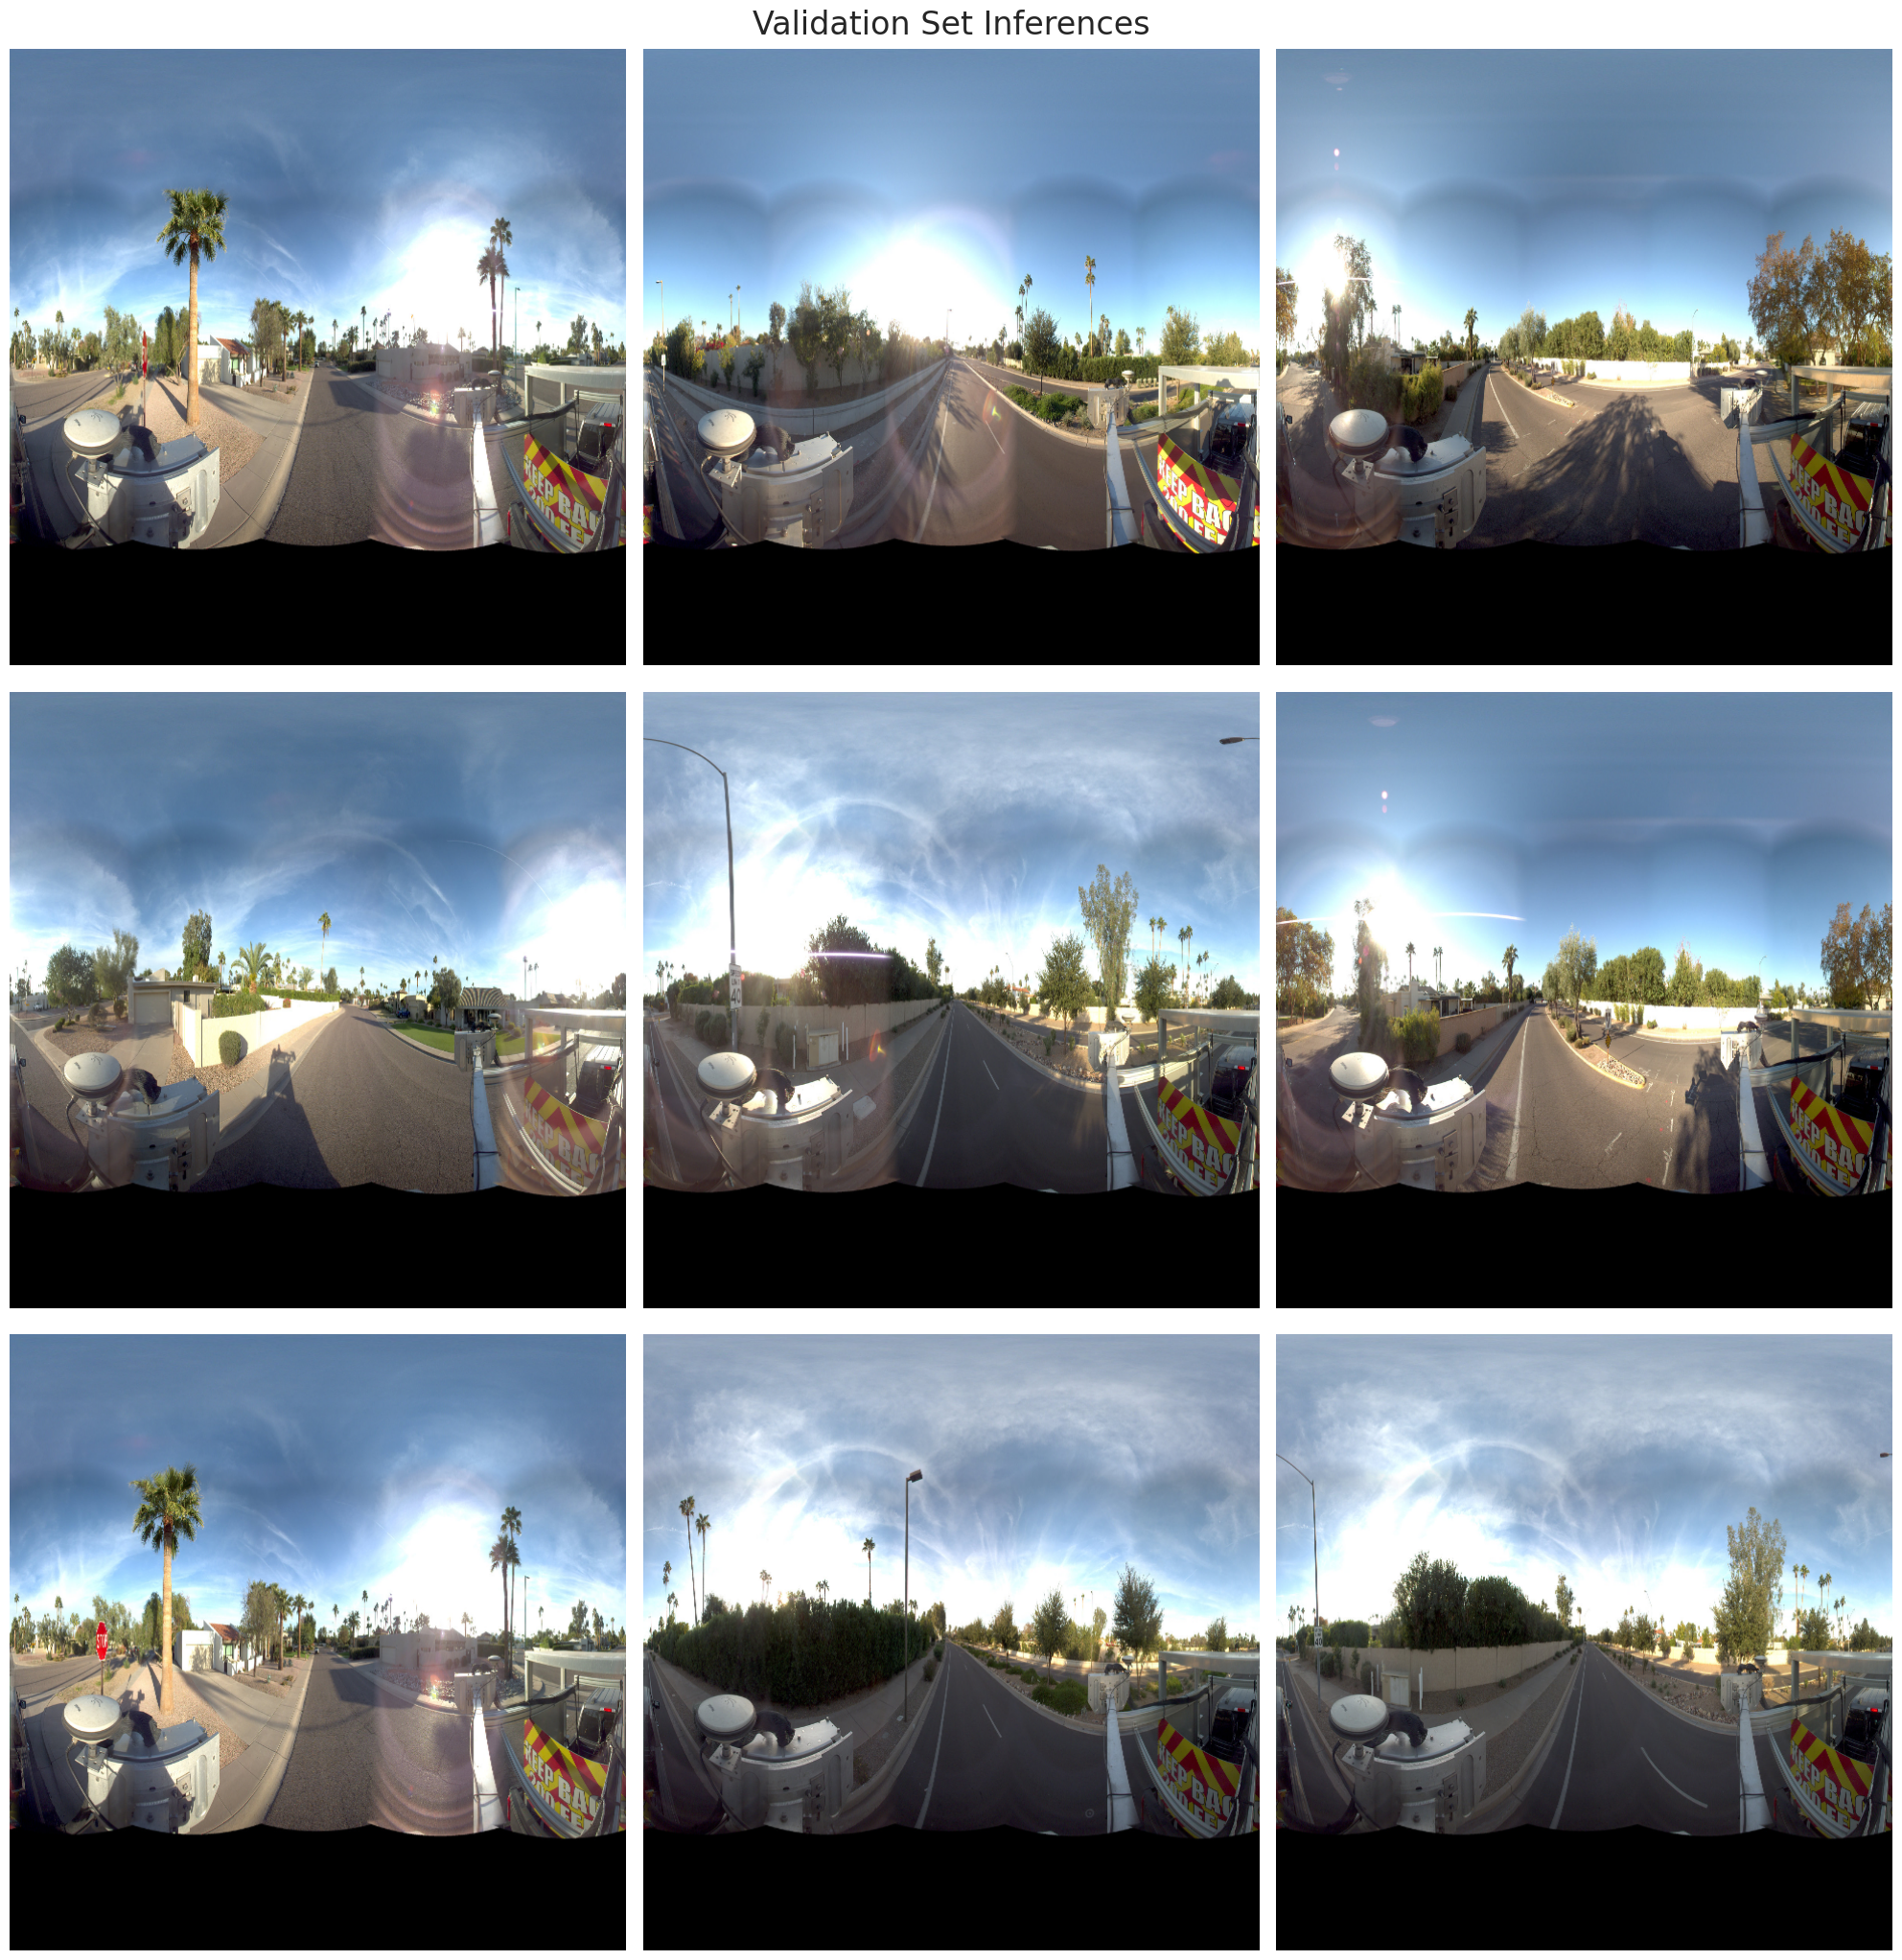

In [28]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/files'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
